# Tarea Examen 1
### Ejercicio 2

## Jonathan Alexis Urrutia Anguiano 414011025

In [8]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline
%run "funciones_a_llamar.ipynb"

Ahora se considerará el mismo sistema pero ahora con una carga positiva como partícula y en el origen abrá también una carga del mismo signo, tal que $q_1=q_2=\sqrt{4\pi\varepsilon_0}$. Entonces la ecuación diferencial es

\begin{align}
\mbox{Si } u_2^2+ u_1^2 v_2^2 < 1& & \mbox{Si } u_2^2+ u_1^2 v_2^2  > 1 \\  \\
\left(\begin{array}{c} \dot u_1 \\ \dot v_1 \\ \dot u_2 \\ \dot v_2 \end{array} \right)=\left(\begin{array}{c} u_2 \\v_2 \\ ( v_2^2-\frac{k}{m}) u_1 -\frac{\gamma}{m} u_2 + \frac{1}{u_1^2}\\ -(2\frac{ u_2}{u_1}+\frac{\gamma}{m}) v_2 
\end{array}\right) 
&  &
\left(\begin{array}{c} \dot u_1 \\ \dot v_1 \\ \dot u_2 \\ \dot v_2 \end{array} \right)=\left(\begin{array}{c} u_2 \\v_2 \\ ( v_2^2-\frac{k}{m}) u_1 -\frac{\mu}{m}((u_2^2+ u_1^2 v_2^2)^{1/4}) u_2 +\frac{1}{u_1^2}\\ -(2\frac{ u_2}{u_1}+\frac{\mu}{m}(u_2^2+ u_1^2 v_2^2)^{1/4}) v_2 
\end{array}\right) 
\end{align}

 Donde $u_1 = r,\,v_1=\theta,\,u_2 = \dot r\mbox{ y }v_2 = \dot \theta$


In [10]:
def resorte_carga(r, t, args = [1.,1.,1.,0.1,0.2]):  # #r = [r, theta, dot r, dot theta], args = [m,q,k,,gamma,mu]; gamma=mu=0 es no friccion 
    u1, v1, u2, v2 = r[0], r[1], r[2], r[3]  
    m, q, k, gamma, mu = args[0], args[1], args[2], args[3], args[4]
    
    norm_vel = sqrt(u2**2 +(u1*v2)**2) 
    du1, dv1 = u2, v2
        
    if u1 != 0 and norm_vel <= 1:
        du2 = (v2*v2-(k/m))*u1 - (gamma/m)*u2 + (1/(u1**2))
        dv2 = -(2*(u2/u1)+(gamma/m))*v2
    elif u1 != 0 and norm_vel > 1:
        du2 = (v2**2-(k/m))*u1 -(mu/m)*sqrt(norm_vel)*u2 + (1/(u1**2))
        dv2 = -(2*(u2/u1)+(gamma/m)*sqrt(norm_vel))*v2
    elif u1 == 0 and norm_vel <= 1:
        du2 = (v2*v2-(k/m))*u1 - (gamma/m)*u2 + (1/(u1**2))
        dv2 = 0
    else:
        du2 = (v2**2-(k/m))*u1 -(mu/m)*sqrt(norm_vel)*u2 + (1/(u1**2))
        dv2 = 0        
        
    return array([du1, dv1, du2, dv2])

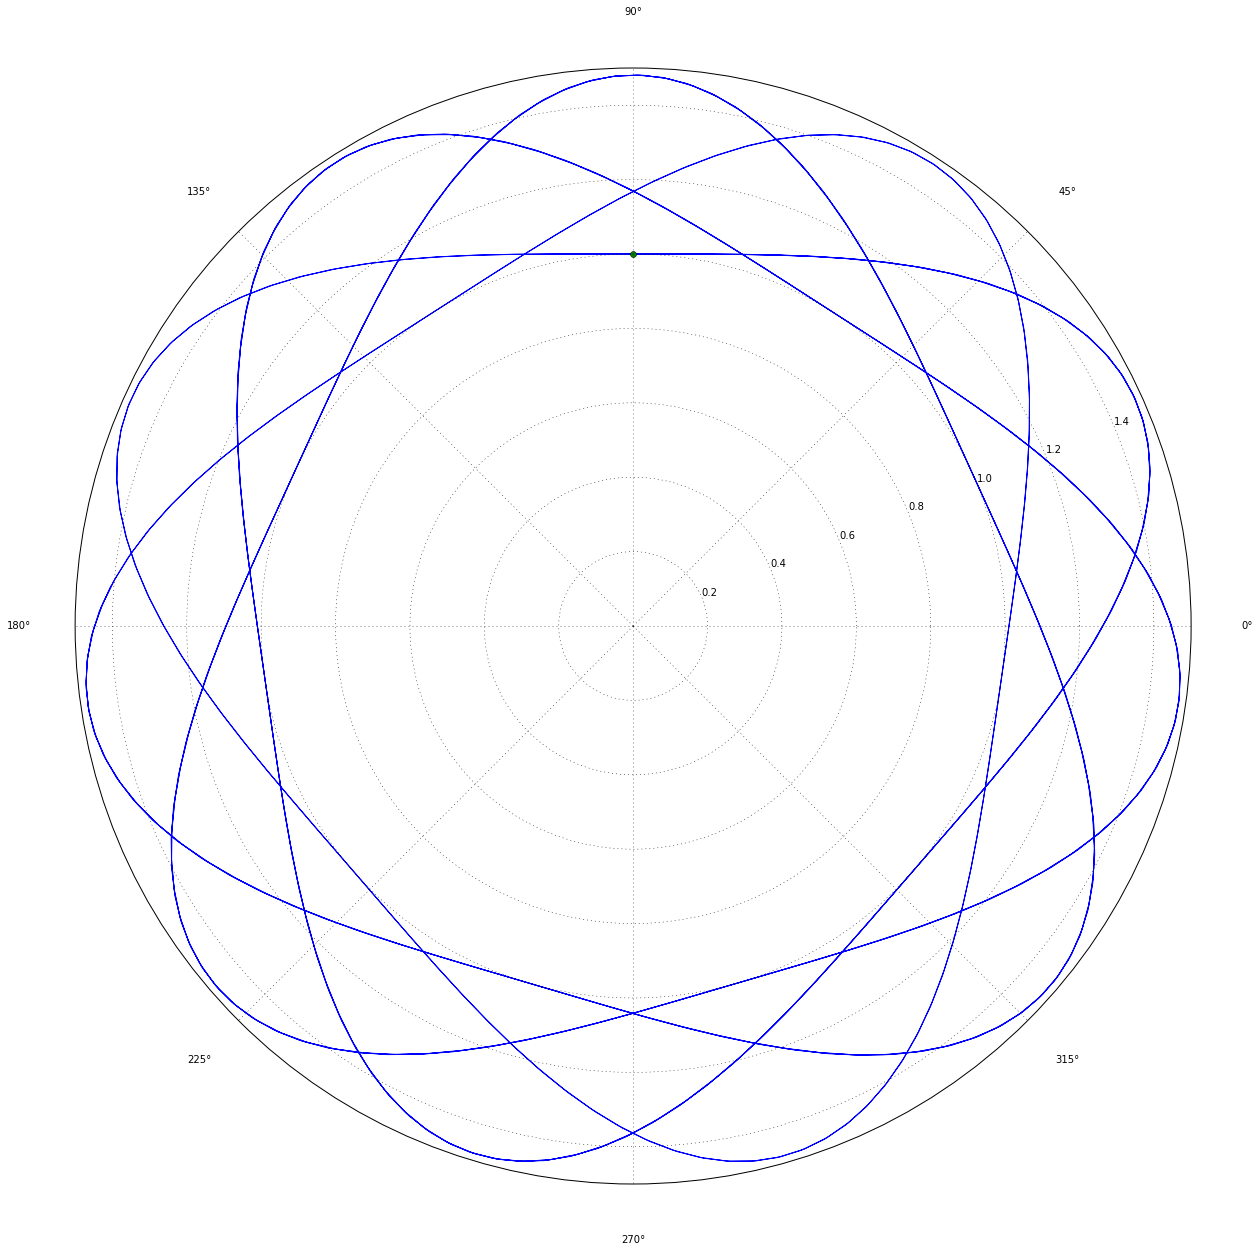

In [16]:
cond_ini = [1,pi/2, 0 , -1]
t_f = 100

fig = figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='polar')
grid(True)

t_c, sol_c = rk4(resorte_carga, cond_ini, [0,t_f],[1.,1.,1.,0,0])
ax.plot(sol_c[:,1], sol_c[:,0], linewidth=1)
plot(pi/2,1,'o')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.)
show()

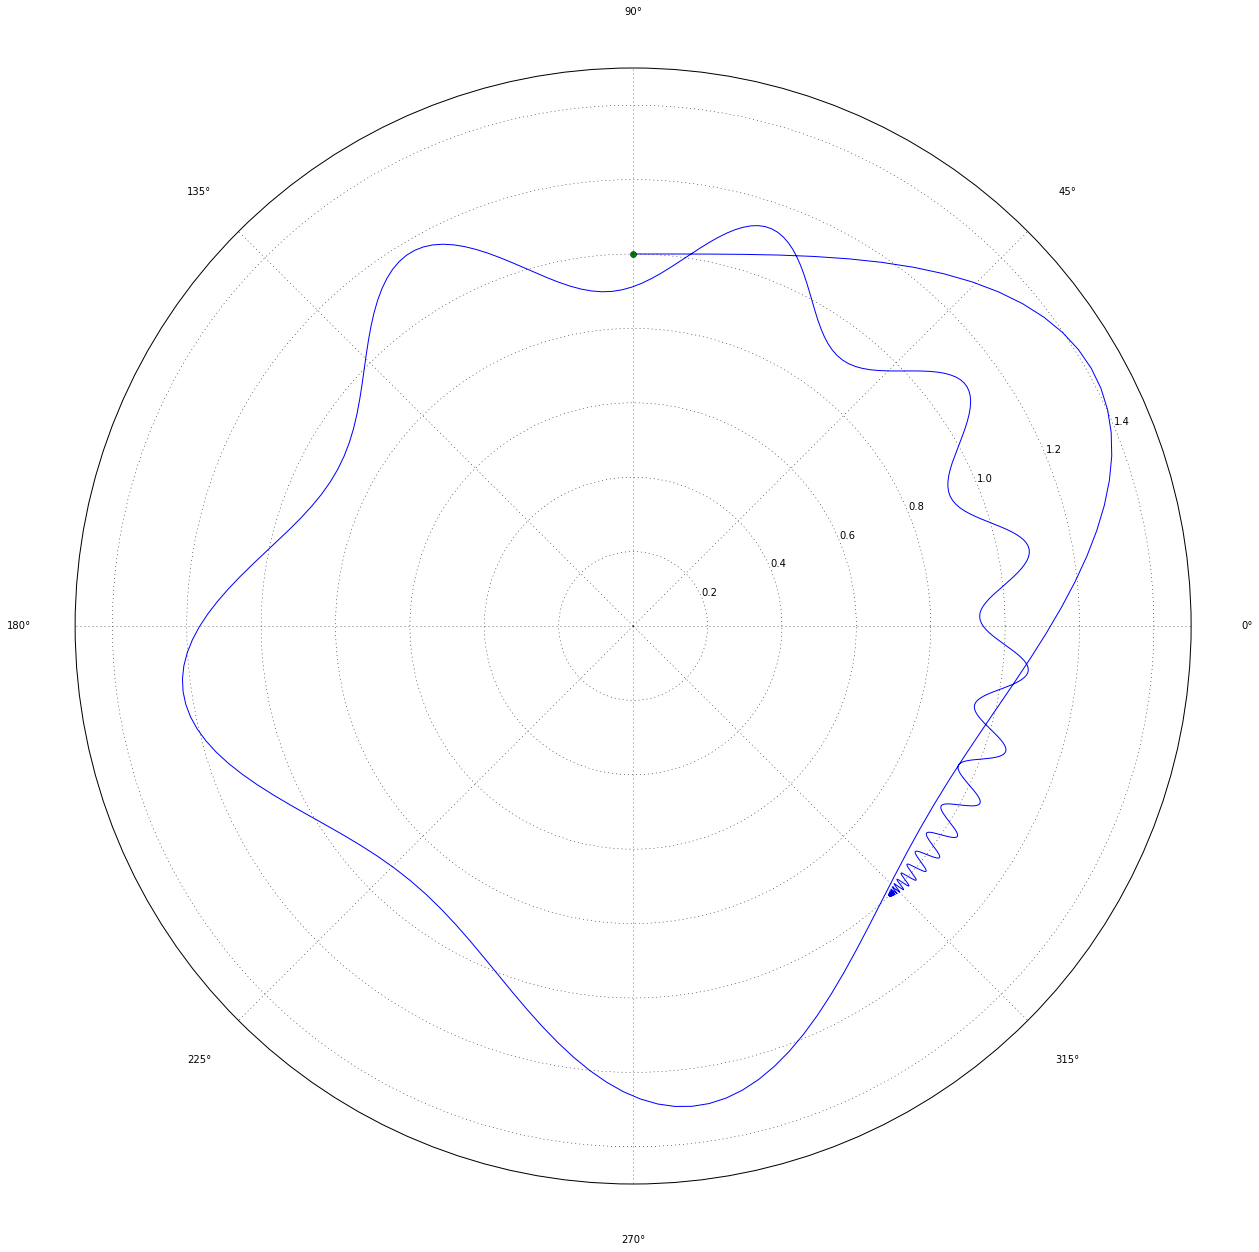

In [13]:
cond_ini = [1,pi/2, 0 , -1]
t_f = 100000

fig = figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='polar')
grid(True)

t_c, sol_c = rk4(resorte_carga, cond_ini, [0,t_f])
ax.plot(sol_c[:,1], sol_c[:,0], linewidth=1)
plot(pi/2,1,'o')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.)
show()

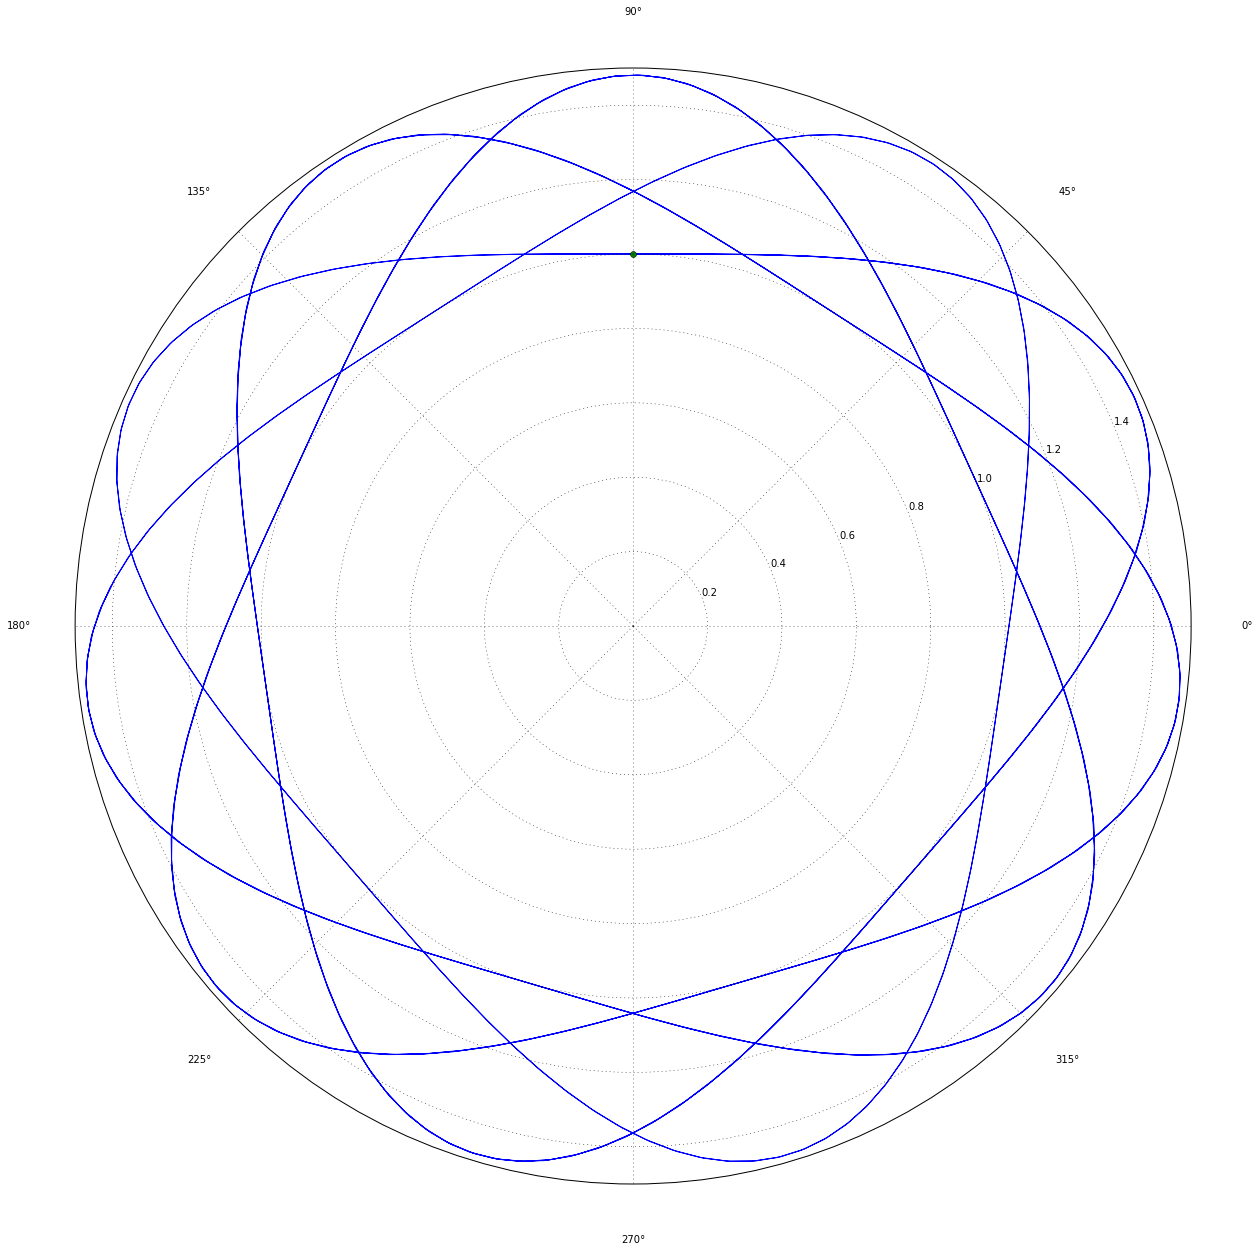